#### IMPORTING REQUIRED LIBRARIES

In [94]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


import tensorflow
import keras
from keras.models import Sequential
from keras.optimizers import SGD
from keras.layers import InputLayer, Dense
from keras.metrics import F1Score, Precision, Accuracy

#### IMPORTING Regression DATASET

In [208]:
df = pd.read_csv(r"E:\#Data Science Innomatics\Module 6 Ai-ML\Datasets\Datasets\Diwali Sales Data.csv", encoding='latin1')
df

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


#### DATASET INFORMATION

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [210]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [211]:
df.shape

(11251, 13)

#### EXPLORATORY DATA ANALYSIS

**Duplicated**

In [212]:
df.duplicated().sum()

8

In [213]:
df.drop_duplicates(inplace=True)

In [214]:
df.duplicated().sum()

0

**Missing Values**

In [215]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [216]:
df.dropna(axis=0, inplace=True)

In [217]:
df.isna().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

**DataTypes**

In [218]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

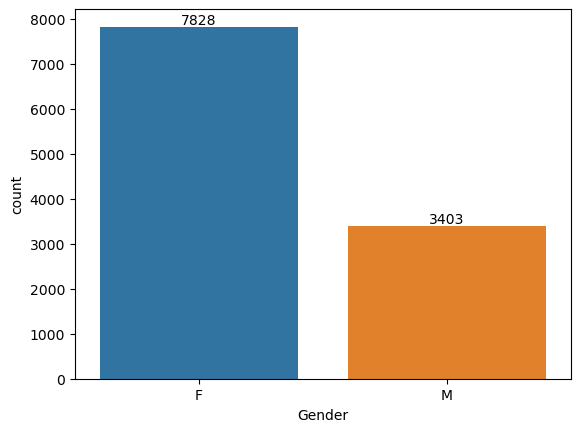

In [219]:
ax = sns.countplot(x = 'Gender', data = df)

for i in ax.containers:
    ax.bar_label(i)

<Axes: >

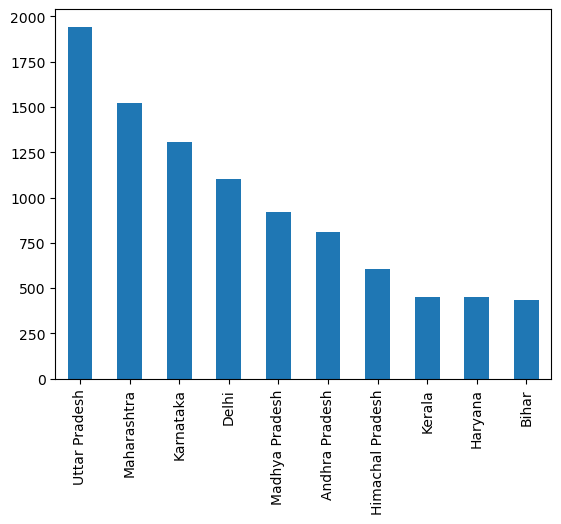

In [120]:
df['State'].value_counts().nlargest(10).plot(kind='bar')

<Axes: >

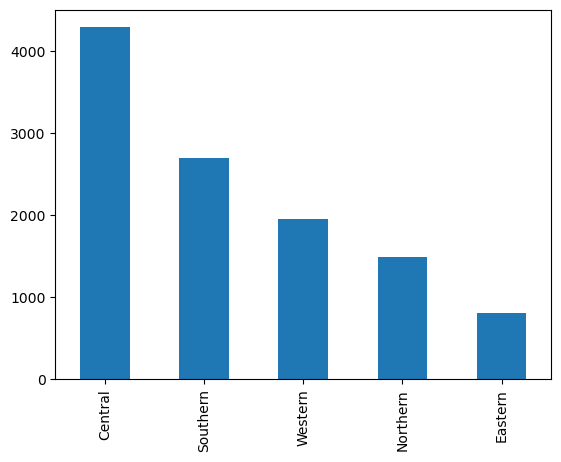

In [122]:
df['Zone'].value_counts().plot(kind='bar')

<Axes: >

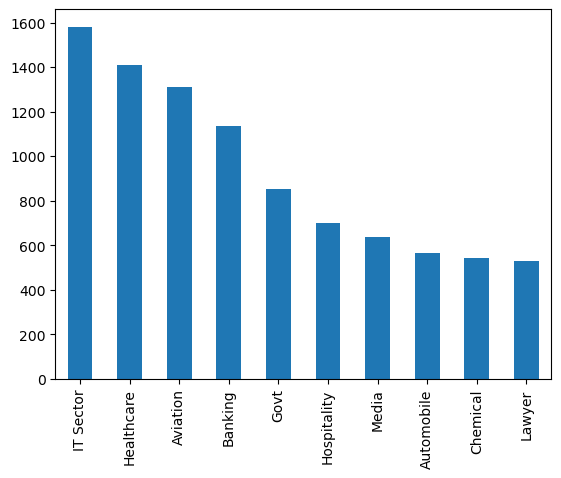

In [123]:
df['Occupation'].value_counts().nlargest(10).plot(kind='bar')

<Axes: >

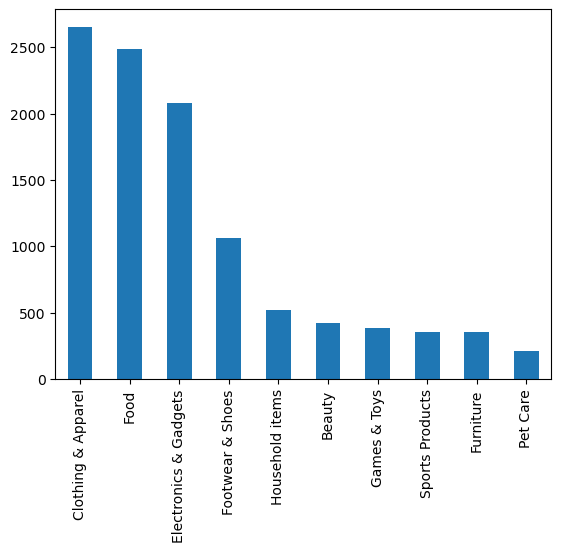

In [124]:
df['Product_Category'].value_counts().nlargest(10).plot(kind='bar')

<Axes: >

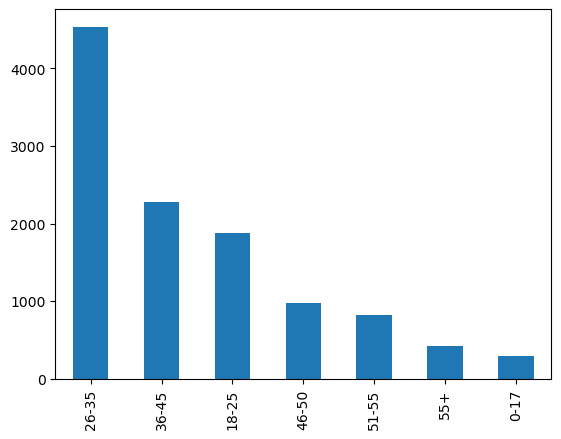

In [125]:
df['Age Group'].value_counts().nlargest(10).plot(kind='bar')

In [130]:
print("Min Amount purchased",df['Amount'].min())
print("Max Amount purchased",df['Amount'].max())

Min Amount purchased 188.0
Max Amount purchased 23952.0


<Axes: ylabel='Frequency'>

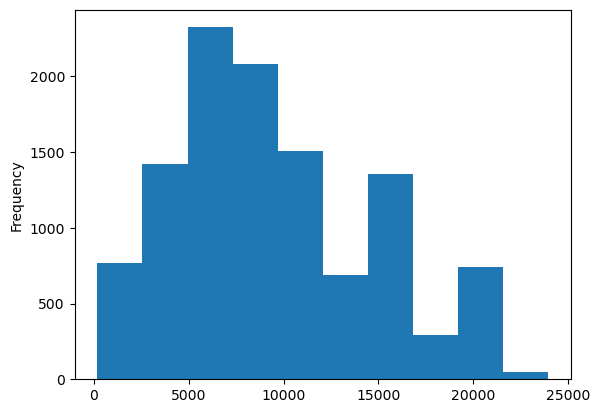

In [127]:
df['Amount'].plot(kind='hist')

<Axes: ylabel='Frequency'>

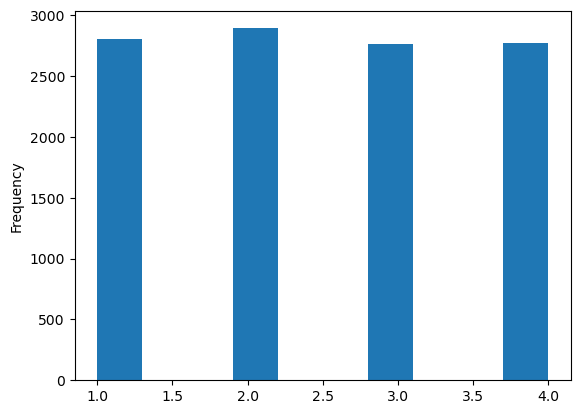

In [131]:
df['Orders'].plot(kind='hist')

<Axes: ylabel='Frequency'>

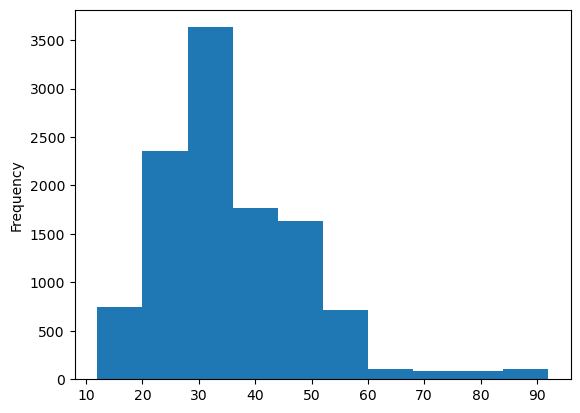

In [152]:
df['Age'].plot(kind='hist')

#### FEATURE SELECTION

In [132]:
df.var()

C:\Users\User\AppData\Local\Temp\ipykernel_10780\1568254755.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.var()


User_ID           2.944844e+06
Age               1.627185e+02
Marital_Status    2.436214e-01
Orders            1.242958e+00
Amount            2.726645e+07
dtype: float64

In [220]:
df.drop(['User_ID','Cust_name','Product_ID', 'Age Group'], axis=1, inplace=True)

In [221]:
df

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,F,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,F,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,F,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,M,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,M,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...
11246,M,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,M,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,F,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,M,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


#### DATA PREPROCESSING

In [222]:
def gen(n):
    if n == 'F':
        return 0
    else:
        return 1
    
df['Gender'] = df['Gender'].apply(gen)

In [223]:
lab = LabelEncoder()

columns_to_encode = ['State','Zone', 'Occupation', 'Product_Category']

for i in columns_to_encode:
    df[i] = lab.fit_transform(df[i])

In [224]:
df

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,0,28,0,10,4,8,0,1,23952.0
1,0,35,1,0,3,7,0,3,23934.0
2,0,35,1,14,0,1,0,3,23924.0
3,1,16,0,7,3,5,0,2,23912.0
4,1,28,1,3,4,6,0,2,23877.0
...,...,...,...,...,...,...,...,...,...
11246,1,19,1,10,4,4,12,4,370.0
11247,1,33,0,4,2,8,17,3,367.0
11248,0,40,0,9,0,14,12,4,213.0
11249,1,37,0,7,3,0,12,3,206.0


In [235]:
std = StandardScaler()

df = pd.DataFrame(std.fit_transform(df), columns=std.get_feature_names_out())
df

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,-0.659334,-0.581079,-0.850960,0.510122,1.430873,0.280439,-1.798826,-1.335712,2.776582
1,-0.659334,-0.032298,1.175144,-1.658298,0.794684,0.023349,-1.798826,0.458283,2.773135
2,-0.659334,-0.032298,1.175144,1.377490,-1.113883,-1.519191,-1.798826,0.458283,2.771220
3,1.516682,-1.521846,-0.850960,-0.140404,0.794684,-0.490831,-1.798826,-0.438715,2.768922
4,1.516682,-0.581079,1.175144,-1.007772,1.430873,-0.233741,-1.798826,-0.438715,2.762219
...,...,...,...,...,...,...,...,...,...
11226,1.516682,-1.286655,1.175144,0.510122,1.430873,-0.747921,1.802941,1.355280,-1.739747
11227,1.516682,-0.189093,-0.850960,-0.790930,0.158495,0.280439,3.303678,0.458283,-1.740322
11228,-0.659334,0.359688,-0.850960,0.293280,-1.113883,1.822979,1.802941,1.355280,-1.769815
11229,1.516682,0.124496,-0.850960,-0.140404,0.794684,-1.776281,1.802941,0.458283,-1.771156


In [236]:
df

,Gender,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,-0.659334,-0.581079,-0.850960,0.510122,1.430873,0.280439,-1.798826,-1.335712,2.776582
1,-0.659334,-0.032298,1.175144,-1.658298,0.794684,0.023349,-1.798826,0.458283,2.773135
2,-0.659334,-0.032298,1.175144,1.377490,-1.113883,-1.519191,-1.798826,0.458283,2.771220
3,1.516682,-1.521846,-0.850960,-0.140404,0.794684,-0.490831,-1.798826,-0.438715,2.768922
4,1.516682,-0.581079,1.175144,-1.007772,1.430873,-0.233741,-1.798826,-0.438715,2.762219
...,...,...,...,...,...,...,...,...,...
11226,1.516682,-1.286655,1.175144,0.510122,1.430873,-0.747921,1.802941,1.355280,-1.739747
11227,1.516682,-0.189093,-0.850960,-0.790930,0.158495,0.280439,3.303678,0.458283,-1.740322
11228,-0.659334,0.359688,-0.850960,0.293280,-1.113883,1.822979,1.802941,1.355280,-1.769815
11229,1.516682,0.124496,-0.850960,-0.140404,0.794684,-1.776281,1.802941,0.458283,-1.771156


In [237]:
X = df.drop('Amount', axis=1)
y = df['Amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=23)

#### LOGICAL STRUCTURE

In [246]:
model = Sequential()

model.add(InputLayer(input_shape=(8,)))
model.add(Dense(units=12, activation='sigmoid', use_bias=True))
model.add(Dense(units=8, activation='sigmoid', use_bias=True))
model.add(Dense(units=6, activation='sigmoid', use_bias=True))
model.add(Dense(units=1, activation='sigmoid', use_bias=True))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


#### MODEL COMPILING

In [247]:
sgd = SGD(learning_rate=0.001)

model.compile(optimizer=sgd, loss = 'mean_squared_error', metrics=['r2_score'])

#### MODEL TRAINING

In [248]:
history = model.fit(X_train, y_train, batch_size=10, epochs=10, validation_split=0.2)

Epoch 1/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.1740 - r2_score: -0.1685 - val_loss: 1.0823 - val_r2_score: -0.1295
Epoch 2/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.1069 - r2_score: -0.1209 - val_loss: 1.0433 - val_r2_score: -0.0889
Epoch 3/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0751 - r2_score: -0.0753 - val_loss: 1.0209 - val_r2_score: -0.0655
Epoch 4/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0620 - r2_score: -0.0656 - val_loss: 1.0069 - val_r2_score: -0.0509
Epoch 5/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0358 - r2_score: -0.0405 - val_loss: 0.9976 - val_r2_score: -0.0412
Epoch 6/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0330 - r2_score: -0.0312 - val_loss: 0.9910 - val_r2_score: -0.0343
Epoch 7/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0076 - r2_score: -0.0305 - val_loss: 0.9862 - val_r2_score: -0.0293
Epoch 8/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.0531 - r2_score: -0.0207 - v

#### Training loss & Validattion loss Plotting

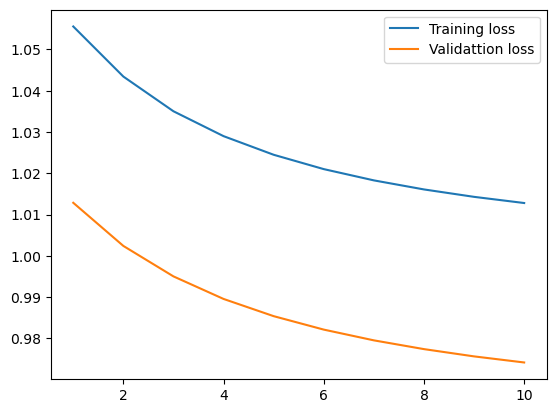

In [241]:
plt.plot(range(1,11), history.history['loss'], label = 'Training loss')
plt.plot(range(1,11), history.history['val_loss'], label = 'Validattion loss')
plt.legend()

#### PREDICTIONS

In [242]:
model.predict(X_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.11433255],
       [0.11562005],
       [0.11783612],
       ...,
       [0.11531926],
       [0.11459743],
       [0.1143548 ]], dtype=float32)

In [243]:
y_pred = model.predict(X_test)

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


#### MODEL EVALUATION

In [244]:
metrics.r2_score(y_test, y_pred )

-0.01109686321913017

In [245]:
metrics.root_mean_squared_error(y_test, y_pred )

1.0244961704620605